<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández y Juan Pablo Ruiz Magaña.

**Fecha:** 12 de Marxzo del 2021.

**Expediente** : 722627, 721093.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 7: Clase 13

## Enunciado de tarea (Transcibirlo)
> Descripción de la tarea

### Ejercicio 1: (enunciado)

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
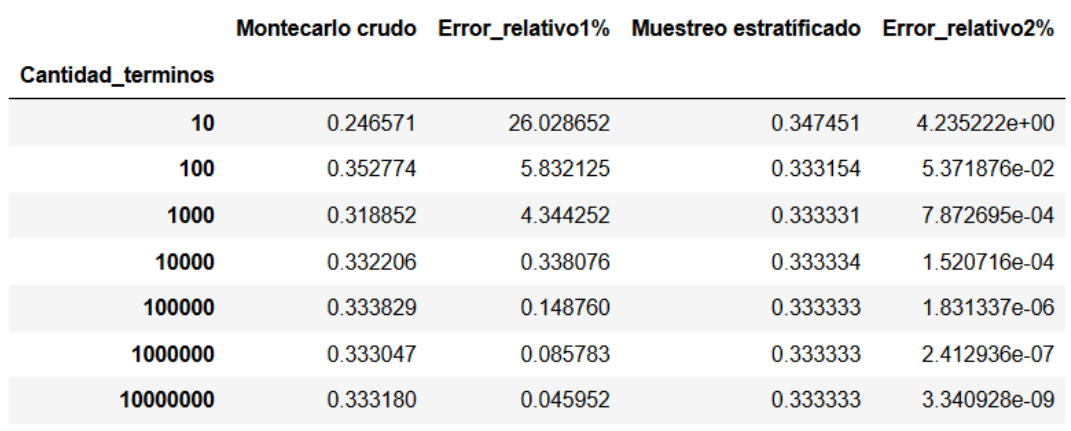

In [ ]:
# Código de solución 
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Respuestas de Juan Pablo:

### `Aproximación por medio de Monte Carlo crudo`

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

1. **Se define la función.**

In [1]:
def monte_carlo(a,b,f,u):
    return ((b-a)/len(u))*(f(u).sum())

2. Se generan aleatorios uniformemente distribuidos. 

In [33]:
a = 0
b = 1
N = np.logspace(1,7,7,dtype=int)
U = [np.random.uniform(0,1,i) for i in N]

3. Se evalua iterativamente los N uniformemente definidos en el método monte carlo crudo.

In [30]:
m_results = [monte_carlo(a,b,lambda x: x**2,i) for i in U]

### `Aproximación por medio de Muestreo Estratificado`

1. Se define función de muestreo estratificado que solo reciba como parametro el número de estratos

In [31]:
def m_estrato(N):
    global a,b
    U = np.random.uniform(a,b,N)
    estratos = np.arange(0,N)
    samples = st.norm.ppf((U+estratos)/N)
    return samples
    

2. Se evaluan los valores uniformemente generados en la función.

In [51]:
samples = [m_estrato(i) for i in N]

In [52]:
estrato_results = list(map(lambda x: x.mean(),samples))

In [54]:
estrato_results

[0.08886918650229561,
 -0.0008014701364936938,
 3.429202345557769e-05,
 6.757674764776312e-06,
 1.0399129178676958e-06,
 2.0632123530072022e-07,
 4.754876103106653e-10]

### `Comparación de resultados obtenidos por ambos metodos`

1. Creación del DataFrame

In [53]:
I_var = 1/3
datos = pd.DataFrame(index=N,columns=['Monte Carlo crudo','Error_relativo1%','Muestreo Estratificado','Error_relativo2%'])
datos.index.name='Cantidad terminos'
datos.loc[N,'Monte Carlo crudo'] = m_results
datos.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,'Monte Carlo crudo']-I_var)*100/I_var
datos.loc[N,'Muestreo Estratificado'] = estrato_results
datos.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,'Muestreo Estratificado']-I_var)*100/I_var
datos

Monte Carlo crudo Error_relativo1% Muestreo Estratificado  \
Cantidad terminos                                                             
10                         0.289082          13.2754              0.0888692   
100                        0.356392          6.91748            -0.00080147   
1000                       0.330395         0.881512             3.4292e-05   
10000                       0.32829          1.51309            6.75767e-06   
100000                      0.33327        0.0190914            1.03991e-06   
1000000                    0.333131        0.0607869            2.06321e-07   
10000000                   0.333238        0.0286063            4.75488e-10   

                                                    Error_relativo2%  
Cantidad terminos                                                     
10                 [530.7395150695592, 462.2653423029273, 292.188...  
100                [811.4550585591021, 775.4358223642452, 699.010...  
1000               [1071.7630202056669, 989.4301176382185, 930.64...  
10000              [1278.5277982329212, 1190.5269162832144, 1150....  
100000             [1491.9591292826058, 1345.7720968276944, 1319....  
1000000            [1551.6765635952727, 1489.164387985391, 1481.8...  
10000000           [1959.8976242422698, 1657.654263396648, 1611.6...

### Respuestas de Daniel: